In [1]:
import torch
import gym
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from IPython import display
from dqn_agent import DQN_AGENT

In [2]:
def load_weights(agent, checkpoint_filename):
    checkpoint = torch.load(f"{checkpoint_filename}")
    agent.learning_network.load_state_dict(checkpoint["state_dict"])
    return agent

In [3]:
env = gym.make("CartPole-v0")

In [4]:
env_state_size = env.observation_space.shape[0]
env_action_size = env.action_space.n

In [5]:
agent = DQN_AGENT(env_state_size, env_action_size, 42)
agent = load_weights(agent, "saved_models/131_model.pth")

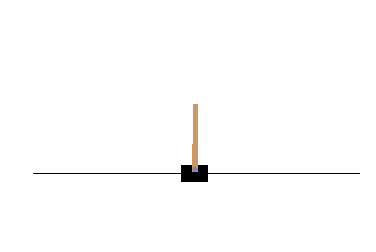

In [6]:
demo_runs = 100

state = env.reset()
img = plt.imshow(env.render(mode="rgb_array"))

for i in range(demo_runs):
    action = agent.act(state, 0.01)
    img.set_data(env.render(mode="rgb_array"))
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    
    if done:
        state = env.reset() 
        
env.close()    